### importing the important libraries and datasets

In [261]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [262]:
Customer_acquistion = pd.read_csv(r"/Users/rjain7/Downloads/Customer Acqusition.csv")
Customer_acquistion.head(5)

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary


In [263]:
Spend = pd.read_csv(r"/Users/rjain7/Downloads/Spend.csv")
Spend['Month']=Spend['Month'].apply(lambda x:pd.to_datetime(x))
Spend.head(5)

,Sl No:,Customer,Month,Type,Amount
0,1,A1,2004-01-12,JEWELLERY,485470.80
1,2,A1,2004-01-03,PETRO,410556.13
2,3,A1,2004-01-15,CLOTHES,23740.46
3,4,A1,2004-01-25,FOOD,484342.47
4,5,A1,2005-01-17,CAMERA,369694.07


In [264]:
Repayment = pd.read_csv(r"/Users/rjain7/Downloads/Repayment.csv")
Repayment['Month']=Repayment['Month'].apply(lambda x:pd.to_datetime(x))
Repayment.drop(['Unnamed: 4'],axis=1,inplace=True)
Repayment.dropna(axis=0,inplace=True)
Repayment.head(5)

,SL No:,Customer,Month,Amount
1,2.0,A1,2004-01-03,245899.02
2,3.0,A1,2004-01-15,259490.06
3,4.0,A1,2004-01-25,437555.12
4,5.0,A1,2005-01-17,165972.88
5,6.0,A1,2005-02-23,365366.62


## Question 1. 
### a. In case age is less than 18, replace it with mean of age values.

In [265]:
mean = Customer_acquistion["Age"].mean()
y = Customer_acquistion
y["Age"] = np.where(y["Age"] < 18, mean, y["Age"])
y.head()

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34.0,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47.0,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56.0,BANGALORE,Platimum,10002.0,C5,Normal Salary


## b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit.
### (customer’s limit provided in acquisition table is the per transaction limit on his card)

In [266]:
cs_spend = pd.merge(left= Customer_acquistion , right = Spend , how = "inner" ,left_on = 'No', right_on = 'Sl No:' )
cs_spend.head(5)

,No,Customer_x,Age,City,Product,Limit,Company,Segment,Sl No:,Customer_y,Month,Type,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,A1,2004-01-12,JEWELLERY,485470.80
1,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,2,A1,2004-01-03,PETRO,410556.13
2,3,A3,34.0,COCHIN,Platimum,10000.0,C3,Salaried_Pvt,3,A1,2004-01-15,CLOTHES,23740.46
3,4,A4,47.0,BOMBAY,Platimum,10001.0,C4,Govt,4,A1,2004-01-25,FOOD,484342.47
4,5,A5,56.0,BANGALORE,Platimum,10002.0,C5,Normal Salary,5,A1,2005-01-17,CAMERA,369694.07


In [267]:
cs_spend["Amount"] = np.where(cs_spend["Amount"] > cs_spend["Limit"], cs_spend["Limit"] / 2, cs_spend["Amount"])
cs_spend.head()

,No,Customer_x,Age,City,Product,Limit,Company,Segment,Sl No:,Customer_y,Month,Type,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,A1,2004-01-12,JEWELLERY,485470.8
1,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,2,A1,2004-01-03,PETRO,50000.0
2,3,A3,34.0,COCHIN,Platimum,10000.0,C3,Salaried_Pvt,3,A1,2004-01-15,CLOTHES,5000.0
3,4,A4,47.0,BOMBAY,Platimum,10001.0,C4,Govt,4,A1,2004-01-25,FOOD,5000.5
4,5,A5,56.0,BANGALORE,Platimum,10002.0,C5,Normal Salary,5,A1,2005-01-17,CAMERA,5001.0


## c. Incase the repayment amount is more than the limit, replace the repayment with the limit.

In [273]:
repayment_amount = pd.merge(left= Customer_acquistion , right = Repayment , how = "inner" ,left_on = 'No', right_on = 'SL No:' )
repayment_amount.head()

,No,Customer_x,Age,City,Product,Limit,Company,Segment,SL No:,Customer_y,Month,Amount
0,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,2.0,A1,2004-01-03,245899.02
1,3,A3,34.0,COCHIN,Platimum,10000.0,C3,Salaried_Pvt,3.0,A1,2004-01-15,259490.06
2,4,A4,47.0,BOMBAY,Platimum,10001.0,C4,Govt,4.0,A1,2004-01-25,437555.12
3,5,A5,56.0,BANGALORE,Platimum,10002.0,C5,Normal Salary,5.0,A1,2005-01-17,165972.88
4,6,A6,70.0,DELHI,Silver,100000.0,C6,Self Employed,6.0,A1,2005-02-23,365366.62


In [274]:
repayment_amount["Amount"] = np.where(repayment_amount["Amount"] > repayment_amount["Limit"], repayment_amount["Limit"] , repayment_amount["Amount"])
repayment_amount.head()

,No,Customer_x,Age,City,Product,Limit,Company,Segment,SL No:,Customer_y,Month,Amount
0,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,2.0,A1,2004-01-03,100000.0
1,3,A3,34.0,COCHIN,Platimum,10000.0,C3,Salaried_Pvt,3.0,A1,2004-01-15,10000.0
2,4,A4,47.0,BOMBAY,Platimum,10001.0,C4,Govt,4.0,A1,2004-01-25,10001.0
3,5,A5,56.0,BANGALORE,Platimum,10002.0,C5,Normal Salary,5.0,A1,2005-01-17,10002.0
4,6,A6,70.0,DELHI,Silver,100000.0,C6,Self Employed,6.0,A1,2005-02-23,100000.0


## 2. From the above dataset create the following summaries:
### a. How many distinct customers exist?

In [277]:
print("Total distinct customers = " , len(Customer_acquistion["Customer"].unique()))

Total distinct customers =  100


### b. How many distinct categories exist?

In [278]:
print(Customer_acquistion["Product"].unique())

['Gold' 'Silver' 'Platimum']


### c. What is the average monthly spend by customers?

In [323]:
cs_spend = pd.merge(left= Customer_acquistion , right = Spend , how = "inner" ,left_on = 'No', right_on = 'Sl No:')
cs_spend['Month'] = cs_spend['Month'].apply(lambda x:x.month)
cs_spend.head(5)

,No,Customer_x,Age,City,Product,Limit,Company,Segment,Sl No:,Customer_y,Month,Type,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,A1,1,JEWELLERY,485470.80
1,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,2,A1,1,PETRO,410556.13
2,3,A3,34.0,COCHIN,Platimum,10000.0,C3,Salaried_Pvt,3,A1,1,CLOTHES,23740.46
3,4,A4,47.0,BOMBAY,Platimum,10001.0,C4,Govt,4,A1,1,FOOD,484342.47
4,5,A5,56.0,BANGALORE,Platimum,10002.0,C5,Normal Salary,5,A1,1,CAMERA,369694.07


In [324]:
avgMonthlySpend = cs_spend[["Month","Customer_x", "Amount"]].groupby(by= ["Customer_x","Month"])["Amount"].mean()
avgMonthlySpend.head()

Customer_x  Month
A1          1        485470.80
A10         2        194795.88
A100        1        284521.06
A11         2        307622.01
A12         2        151921.12
Name: Amount, dtype: float64

### d. What is the average monthly repayment by customers?

In [330]:
cs_repayment = pd.merge(left= Customer_acquistion , right = Repayment , how = "inner" ,left_on = 'No', right_on = 'SL No:' )
cs_repayment['Month'] = cs_repayment['Month'].apply(lambda x:x.month)
cs_repayment.head(5)

,No,Customer_x,Age,City,Product,Limit,Company,Segment,SL No:,Customer_y,Month,Amount
0,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,2.0,A1,1,245899.02
1,3,A3,34.0,COCHIN,Platimum,10000.0,C3,Salaried_Pvt,3.0,A1,1,259490.06
2,4,A4,47.0,BOMBAY,Platimum,10001.0,C4,Govt,4.0,A1,1,437555.12
3,5,A5,56.0,BANGALORE,Platimum,10002.0,C5,Normal Salary,5.0,A1,1,165972.88
4,6,A6,70.0,DELHI,Silver,100000.0,C6,Self Employed,6.0,A1,2,365366.62


In [331]:
avgMonthlyRepayment = cs_repayment[["Month","Customer_x", "Amount"]].groupby(by= ["Customer_x","Month"])["Amount"].mean()
avgMonthlyRepayment.head()

Customer_x  Month
A10         2         48759.19
A100        1        337815.57
A11         2        208317.94
A12         2        150281.43
A13         2        339078.03
Name: Amount, dtype: float64

## e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month?
 (Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment
– Monthly spend. Interest is earned only on positive profits and not on negative amounts)

In [334]:
monthly_interest = pd.merge(left= avgMonthlySpend , right = avgMonthlyRepayment , how = "inner" ,left_on = 'Customer_x', right_on = 'Customer_x' )
monthly_interest.head()

,Amount_x,Amount_y
Customer_x,,
A10,194795.88,48759.19
A100,284521.06,337815.57
A11,307622.01,208317.94
A12,151921.12,150281.43
A13,307940.97,339078.03


In [336]:
monthly_interest['Profit']=monthly_interest['Amount_x'] - monthly_interest['Amount_y']

In [338]:
monthly_interest['Profit']=np.where(monthly_interest['Profit']>0,monthly_interest['Profit']*2.9/100,0)
monthly_interest.head()

,Amount_x,Amount_y,Profit
Customer_x,,,
A10,194795.88,48759.19,122.816856
A100,284521.06,337815.57,0.000000
A11,307622.01,208317.94,83.514723
A12,151921.12,150281.43,1.378979
A13,307940.97,339078.03,0.000000


## f. What are the top 5 product types?

In [340]:
Spend.groupby(by= "Type").sum("Amount").sort_values(by = "Amount").tail(5)

,Sl No:,Amount
Type,,
AIR TICKET,117877,32955445.42
TRAIN TICKET,90087,33067077.15
FOOD,110164,37773338.43
CAMERA,113612,41481571.96
PETRO,146920,49863174.09


## g. Which city is having maximum spend?

In [341]:
max_spend = pd.merge(left= Customer_acuasition , right = Spend , how = "inner" ,left_on = 'No', right_on = 'Sl No:' )
max_spend.head(5)

,No,Customer_x,Age,City,Product,Limit,Company,Segment,Sl No:,Customer_y,Month,Type,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,A1,2004-01-12,JEWELLERY,485470.80
1,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,2,A1,2004-01-03,PETRO,410556.13
2,3,A3,34.0,COCHIN,Platimum,10000.0,C3,Salaried_Pvt,3,A1,2004-01-15,CLOTHES,23740.46
3,4,A4,47.0,BOMBAY,Platimum,10001.0,C4,Govt,4,A1,2004-01-25,FOOD,484342.47
4,5,A5,56.0,BANGALORE,Platimum,10002.0,C5,Normal Salary,5,A1,2005-01-17,CAMERA,369694.07


In [344]:
max_spend.groupby(by= "City").sum("Amount").sort_values(by = "Amount").tail(1)

,No,Age,Limit,Sl No:,Amount
City,,,,,
COCHIN,986,909.98,6130011.0,986,4121386.82


## h. Which age group is spending more money ? 

In [348]:
max_spend['age_group']=np.where(((max_spend['Age'] >= 18) & (max_spend['Age'] < 25)), 'Youth',np.where(((max_spend['Age'] >= 25) & (max_spend['Age'] < 65)), 'Adult','Senior'))

In [349]:
max_spend.groupby('age_group').Amount.sum()

age_group
Adult     16466435.28
Senior     4964193.30
Youth      1058912.57
Name: Amount, dtype: float64

#### We can conclude that age between 25 to 65 have maximum spend from above

### i. Who are the top 10 customers in terms of repayment?

In [350]:
Repayment.groupby(by= "Customer").sum("Amount").sort_values(by = "Amount").tail(10)

,SL No:,Amount
Customer,,
A14,10179.0,7943268.63
A48,31579.0,8292416.75
A12,10117.0,8334760.16
A45,31486.0,8448334.87
A43,31424.0,8489871.46
A21,18491.0,9056336.15
A22,18524.0,9372561.68
A13,10148.0,9572000.66
A60,45464.0,9876290.74


## 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

In [375]:
cs_spend = pd.merge(left= Customer_acquistion , right = Spend , how = "inner" ,left_on = 'No', right_on = 'Sl No:' )
cs_spend['Month'] = cs_spend['Month'].apply(lambda x:x.year)
cs_spend.rename(columns={'Month': 'Year'}, inplace=True)
yearly_city_wise = cs_spend[['Year', 'City', 'Product', 'Amount']]
yearly_city_wise.head(5)

,Year,City,Product,Amount
0,2004,BANGALORE,Gold,485470.80
1,2004,CALCUTTA,Silver,410556.13
2,2004,COCHIN,Platimum,23740.46
3,2004,BOMBAY,Platimum,484342.47
4,2005,BANGALORE,Platimum,369694.07


In [376]:
yearGrouping = yearly_city_wise.groupby(by= ["Year", "City", "Product"]).sum("Amount")
yearGrouping.head()

Amount
Year City      Product            
2004 BANGALORE Gold      485470.80
               Platimum  139814.59
               Silver    390850.96
     BOMBAY    Gold      457931.43
               Platimum  720279.92

<AxesSubplot: xlabel='Year,City,Product'>

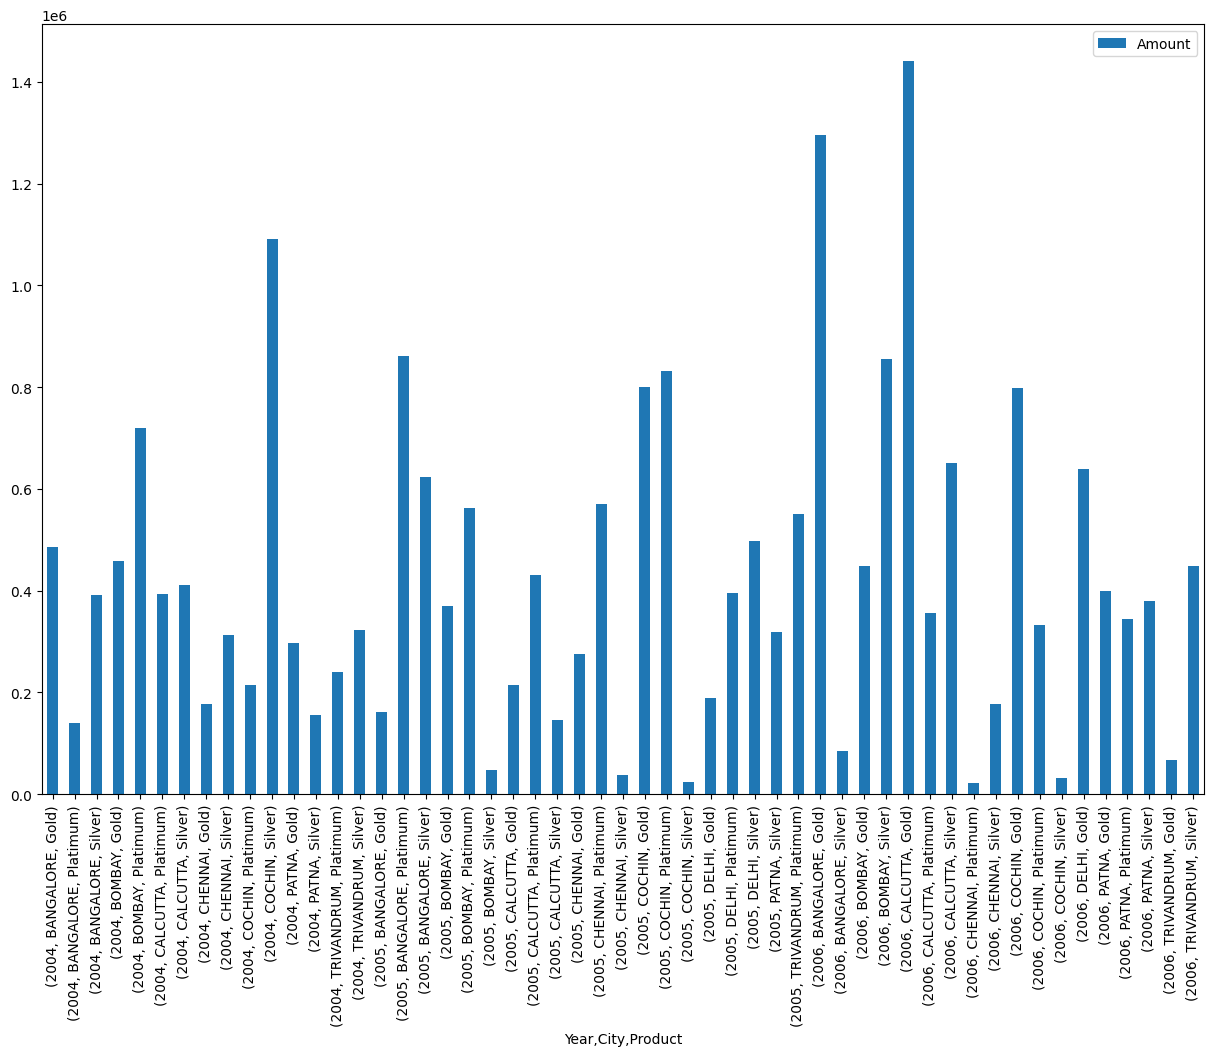

In [377]:
yearGrouping.plot.bar(figsize=(15, 10))

# 4 (A) Graph for Monthly comparison of total spends, city wise

In [378]:
cs_spend = pd.merge(left= Customer_acquistion , right = Spend , how = "inner" ,left_on = 'No', right_on = 'Sl No:' )
cs_spend['Month'] = cs_spend['Month'].apply(lambda x:x.month)
monthly_city_wise = cs_spend[['Month', 'City', 'Amount']]
monthly_city_wise.head(5)

,Month,City,Amount
0,1,BANGALORE,485470.80
1,1,CALCUTTA,410556.13
2,1,COCHIN,23740.46
3,1,BOMBAY,484342.47
4,1,BANGALORE,369694.07


In [379]:
monthlyGrouping = monthly_city_wise.groupby(by= ["Month", "City"]).sum("Amount")
monthlyGrouping.head()

Amount
Month City                
1     BANGALORE  855164.87
      BOMBAY     607347.31
      CALCUTTA   804048.83
      CHENNAI    490132.18
      COCHIN     308261.52

<AxesSubplot: xlabel='Month,City'>

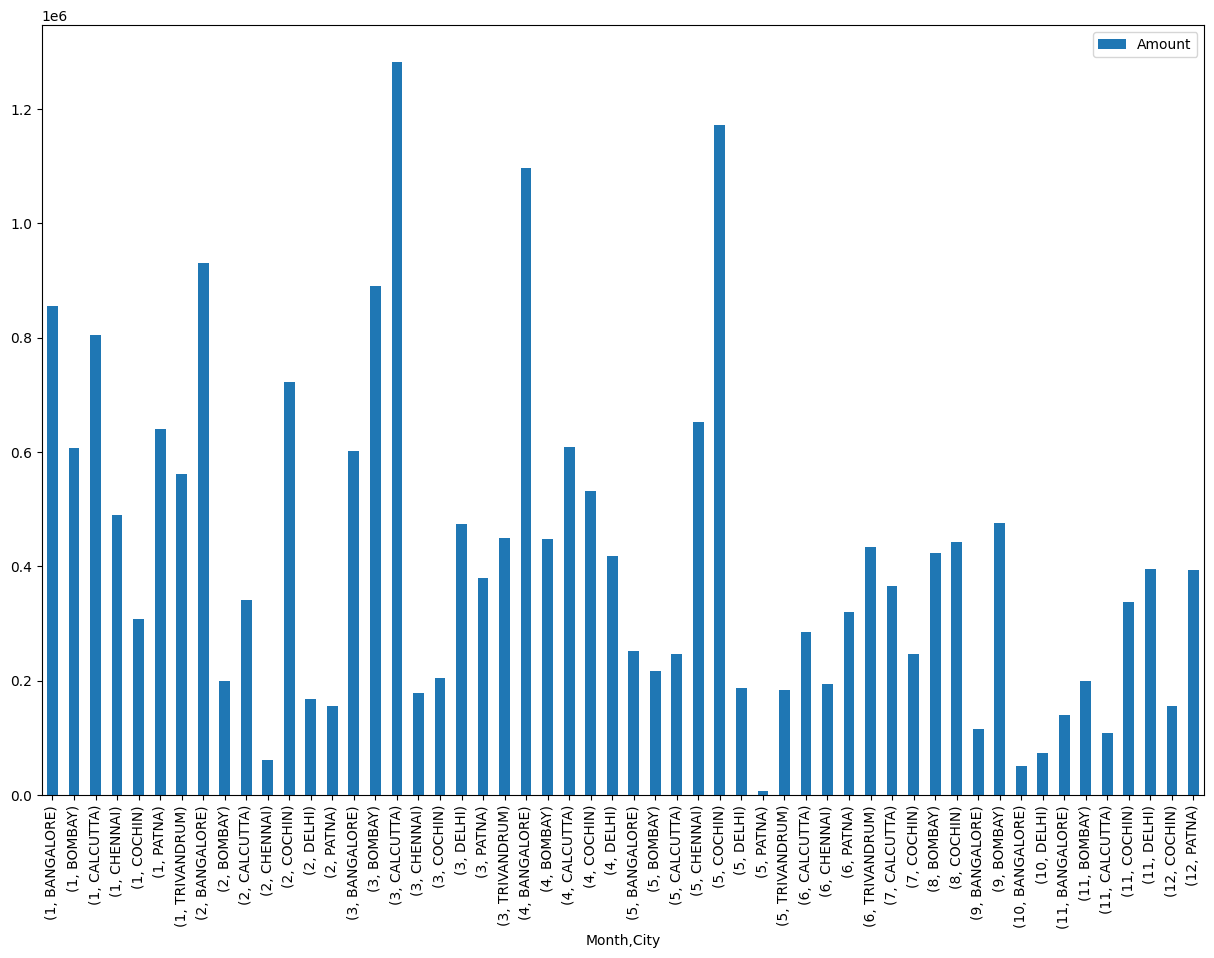

In [374]:
monthlyGrouping.plot.bar(figsize=(15, 10))

# 4 (B) Comparison of yearly spend on air tickets

In [391]:
cs_spend = pd.merge(left= Customer_acquistion , right = Spend , how = "inner" ,left_on = 'No', right_on = 'Sl No:' )
cs_spend['Month'] = cs_spend['Month'].apply(lambda x:x.year)
cs_spend.rename(columns={'Month': 'Year'}, inplace=True)
yearly_city_wise = cs_spend[['Year', 'Type', 'Amount']]
yearly_air_tickets = yearly_city_wise[yearly_city_wise['Type']=='AIR TICKET']
yearly_air_tickets.head()

,Year,Type,Amount
10,2005,AIR TICKET,307622.01
29,2006,AIR TICKET,24399.98
40,2005,AIR TICKET,359764.34
55,2006,AIR TICKET,22463.65
70,2005,AIR TICKET,113339.36


In [394]:
yearAirTicketsGrouping = yearly_air_tickets.groupby(by= ["Year", "Type"]).sum("Amount")
yearAirTicketsGrouping.head()

,,Amount
Year,Type,
2004,AIR TICKET,360587.42
2005,AIR TICKET,1598064.27
2006,AIR TICKET,202774.13


<AxesSubplot: xlabel='Year,Type'>

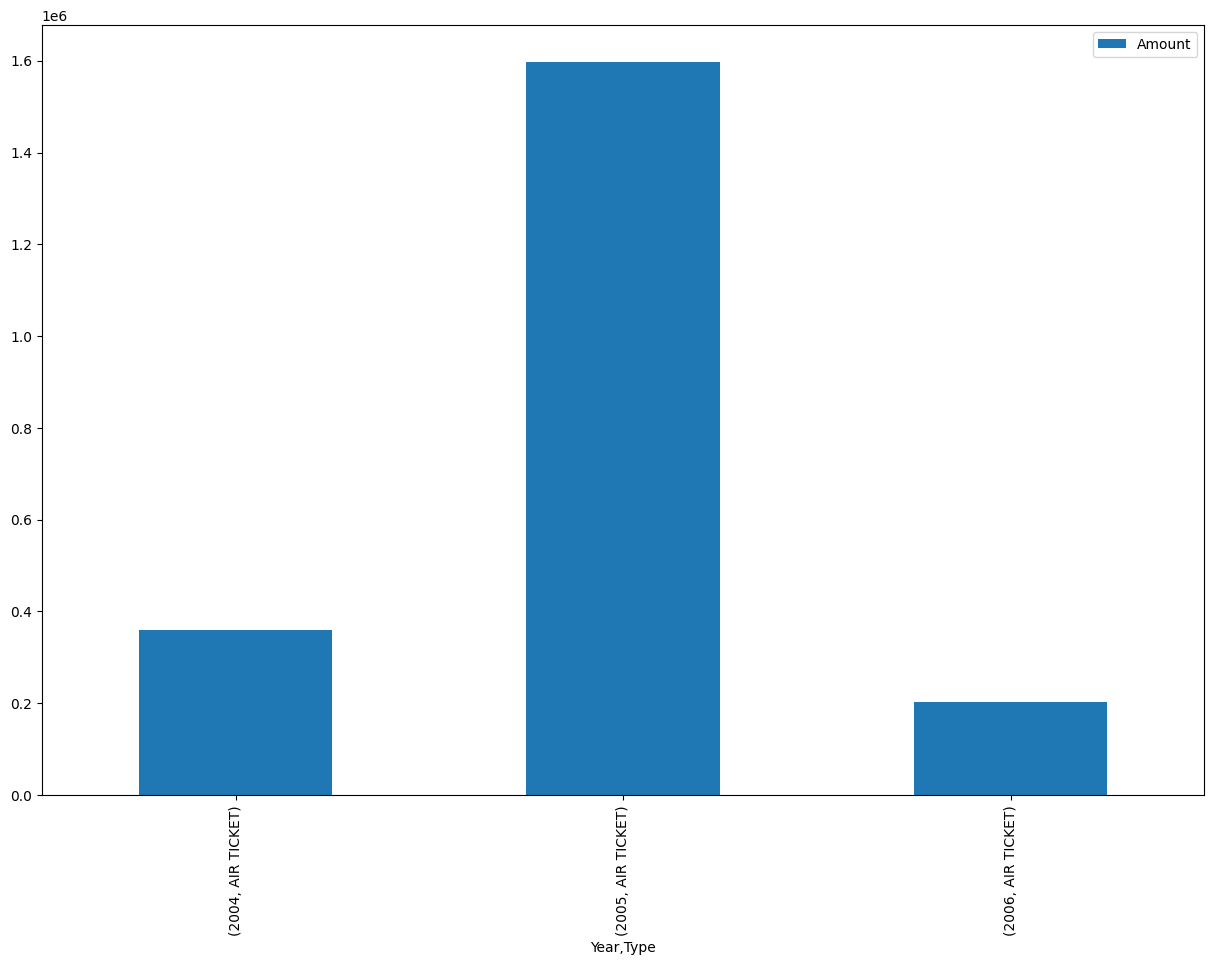

In [395]:
yearAirTicketsGrouping.plot.bar(figsize=(15, 10))

# 4 (C) Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)

In [396]:
cs_spend = pd.merge(left= Customer_acquistion , right = Spend , how = "inner" ,left_on = 'No', right_on = 'Sl No:' )
cs_spend['Month'] = cs_spend['Month'].apply(lambda x:x.year)
monthly_spend_product = cs_spend[['Month', 'Product', 'Amount']]
monthly_spend_product.head(5)

,Month,Product,Amount
0,2004,Gold,485470.80
1,2004,Silver,410556.13
2,2004,Platimum,23740.46
3,2004,Platimum,484342.47
4,2005,Platimum,369694.07


In [398]:
monthlyProductGrouping = monthly_spend_product.groupby(by= ["Month", "Product"]).sum("Amount")
monthlyProductGrouping.head()

Amount
Month Product             
2004  Gold      1418325.13
      Platimum  1707740.80
      Silver    2682736.61
2005  Gold      2008347.77
      Platimum  4203471.69

<AxesSubplot: xlabel='Month,Product'>

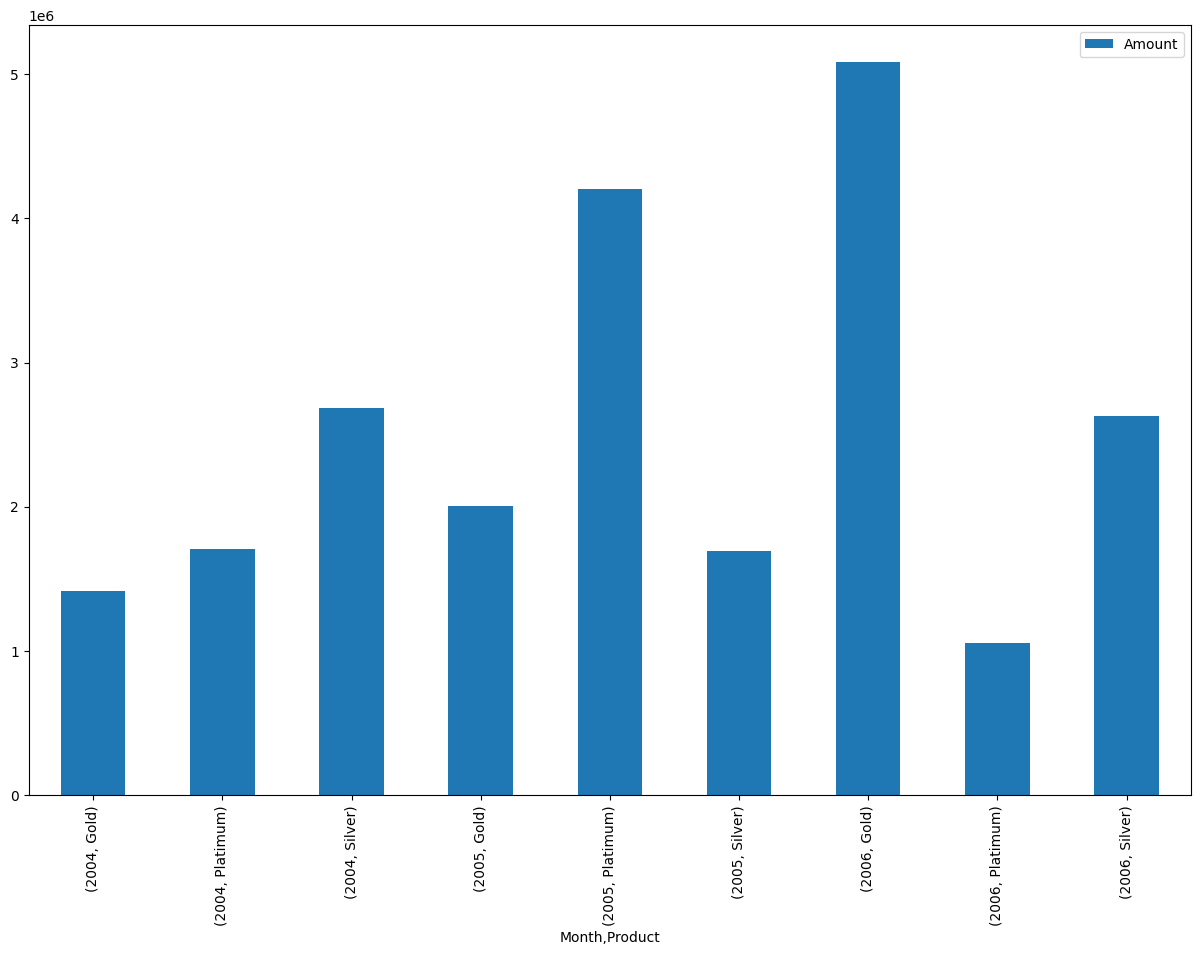

In [399]:
monthlyProductGrouping.plot.bar(figsize=(15, 10))

# 5 Write user defined PYTHON function to perform the following analysis: You need to find top 10 customers for each city in terms of their repayment amount by different products and by different time periods i.e. year or month. The user should be able to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the function should automatically take these inputs while identifying the top 10 customers.

In [432]:
repayment_amount = pd.merge(left= Customer_acquistion , right = Repayment , how = "inner" ,left_on = 'No', right_on = 'SL No:' )
repayment_amount['year_wise']=repayment_amount.Month.apply(lambda x:x.year)
repayment_amount['month_wise']=repayment_amount.Month.apply(lambda x:x.month)
repayment_amount.head()

,No,Customer_x,Age,City,Product,Limit,Company,Segment,SL No:,Customer_y,Month,Amount,year_wise,month_wise
0,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,2.0,A1,2004-01-03,245899.02,2004,1
1,3,A3,34.0,COCHIN,Platimum,10000.0,C3,Salaried_Pvt,3.0,A1,2004-01-15,259490.06,2004,1
2,4,A4,47.0,BOMBAY,Platimum,10001.0,C4,Govt,4.0,A1,2004-01-25,437555.12,2004,1
3,5,A5,56.0,BANGALORE,Platimum,10002.0,C5,Normal Salary,5.0,A1,2005-01-17,165972.88,2005,1
4,6,A6,70.0,DELHI,Silver,100000.0,C6,Self Employed,6.0,A1,2005-02-23,365366.62,2005,2


In [433]:
def getTop10Customers(product, time):
    productFilter = repayment_amount.loc[(repayment_amount.Product == product)]
    customerTable = productFilter.groupby(by= ["Customer_y", "City", "Product", time]).sum("Amount").sort_values(by = "Amount").tail(10)
    return customerTable.tail(10)

In [434]:
product=str(input("Enter product: "))
time=str(input("Enter time: "))

Enter product: Gold
Enter time: month_wise


In [435]:
getTop10Customers(product, time)

,,,,No,Age,Limit,SL No:,Amount,year_wise
Customer_y,City,Product,month_wise,,,,,,
A45,COCHIN,Gold,5,45,67.0,500000.0,45.0,412236.42,2005
A15,CALCUTTA,Gold,3,15,25.0,500000.0,15.0,437119.51,2006
A60,CALCUTTA,Gold,6,60,28.0,500000.0,60.0,448060.59,2006
A92,COCHIN,Gold,4,94,31.0,500000.0,94.0,459105.69,2006
A87,CALCUTTA,Gold,3,89,72.0,500000.0,89.0,462283.02,2006
A65,CHENNAI,Gold,1,67,54.0,500000.0,67.0,468922.60,2004
A26,PATNA,Gold,5,26,38.0,500000.0,26.0,470982.16,2006
A80,DELHI,Gold,3,82,52.0,500000.0,82.0,481205.64,2006
A30,BANGALORE,Gold,5,30,25.0,500000.0,30.0,481343.32,2006
